In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
%matplotlib inline


In [31]:
df = pd.read_csv("netflix_customer_churn.csv")

In [32]:
print("🔹 First 5 rows:")
display(df.head()) 


🔹 First 5 rows:


,customer_id,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
0,a9b75100-82a8-427a-a208-72f24052884a,51,Other,Basic,14.73,29,Africa,TV,8.99,1,Gift Card,1,0.49,Action
1,49a5dfd9-7e69-4022-a6ad-0a1b9767fb5b,47,Other,Standard,0.70,19,Europe,Mobile,13.99,1,Gift Card,5,0.03,Sci-Fi
2,4d71f6ce-fca9-4ff7-8afa-197ac24de14b,27,Female,Standard,16.32,10,Asia,TV,13.99,0,Crypto,2,1.48,Drama
3,d3c72c38-631b-4f9e-8a0e-de103cad1a7d,53,Other,Premium,4.51,12,Oceania,TV,17.99,1,Crypto,2,0.35,Horror
4,4e265c34-103a-4dbb-9553-76c9aa47e946,56,Other,Standard,1.89,13,Africa,Mobile,13.99,1,Crypto,2,0.13,Action


In [33]:
missing = df.isna().sum()
missing_pct = (missing / len(df) * 100).round(2)

missing_summary = (pd
                   .DataFrame({"Missing": missing, "Percent": missing_pct})
                   .sort_values("Missing", ascending=False))

print("\n🔹 Missing / Null Value Summary:")
display(missing_summary)


🔹 Missing / Null Value Summary:


,Missing,Percent
customer_id,0,0.0
age,0,0.0
gender,0,0.0
subscription_type,0,0.0
watch_hours,0,0.0
last_login_days,0,0.0
region,0,0.0
device,0,0.0
monthly_fee,0,0.0
churned,0,0.0


In [34]:
cat_cols = ["gender",
            "subscription_type",
            "region",
            "device",
            "payment_method",
            "favorite_genre"]

print("\n🔹 Unique value counts:")
for col in cat_cols:
    uniques = df[col].unique()
    print(f"{col}: {len(uniques)} unique values → {uniques[:10]}{' ...' if len(uniques) > 10 else ''}")


🔹 Unique value counts:
gender: 3 unique values → ['Other' 'Female' 'Male']
subscription_type: 3 unique values → ['Basic' 'Standard' 'Premium']
region: 6 unique values → ['Africa' 'Europe' 'Asia' 'Oceania' 'South America' 'North America']
device: 5 unique values → ['TV' 'Mobile' 'Laptop' 'Desktop' 'Tablet']
payment_method: 5 unique values → ['Gift Card' 'Crypto' 'Debit Card' 'PayPal' 'Credit Card']
favorite_genre: 7 unique values → ['Action' 'Sci-Fi' 'Drama' 'Horror' 'Romance' 'Comedy' 'Documentary']


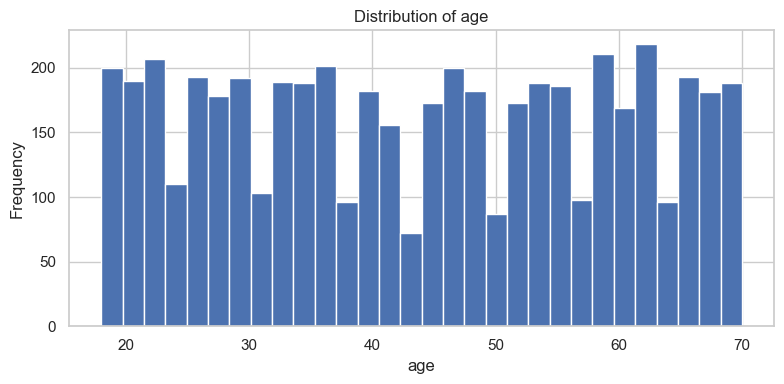

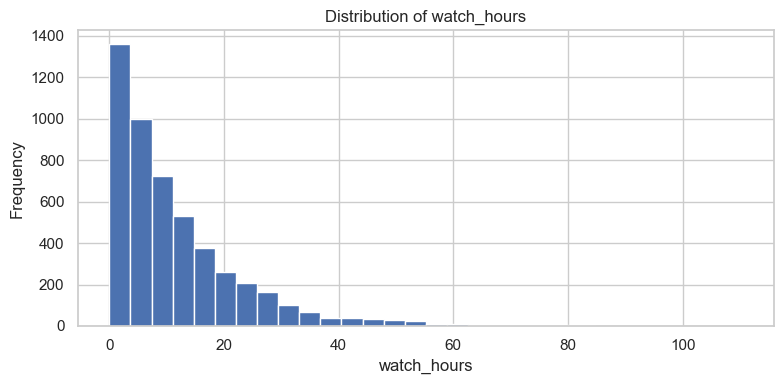

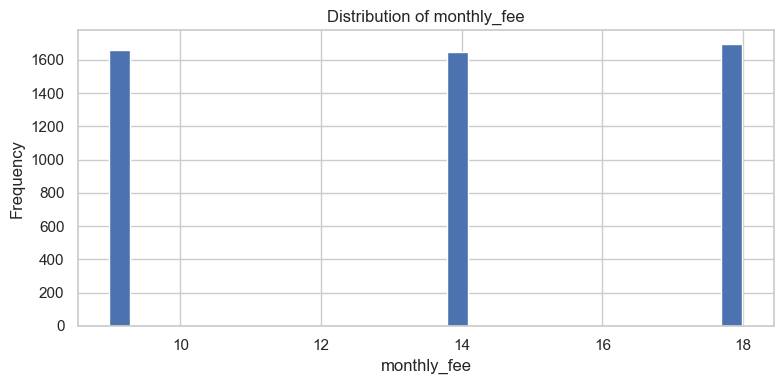

In [35]:
num_cols = ["age", "watch_hours", "monthly_fee"]

for col in num_cols:
    plt.figure(figsize=(8, 4))
    plt.hist(df[col].dropna(), bins=30)          # histogram
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

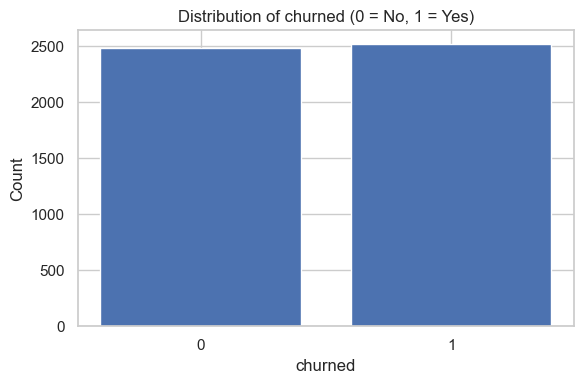

In [36]:
plt.figure(figsize=(6, 4))
churn_counts = df["churned"].value_counts().sort_index()
plt.bar(churn_counts.index.astype(str), churn_counts.values)
plt.title("Distribution of churned (0 = No, 1 = Yes)")
plt.xlabel("churned")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

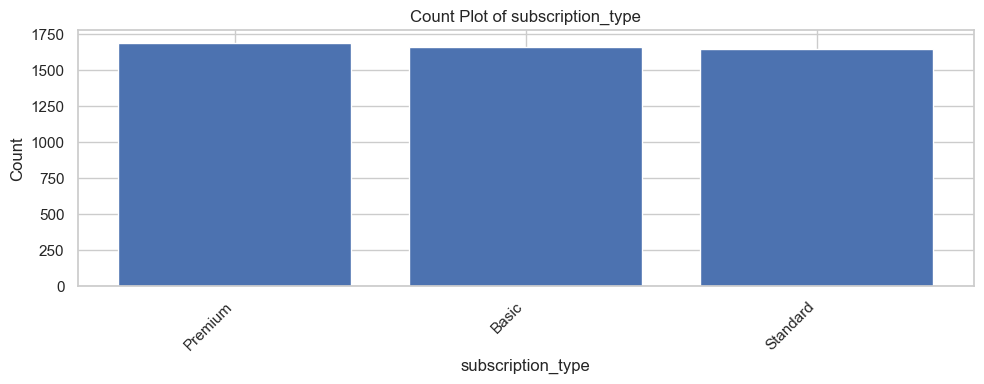

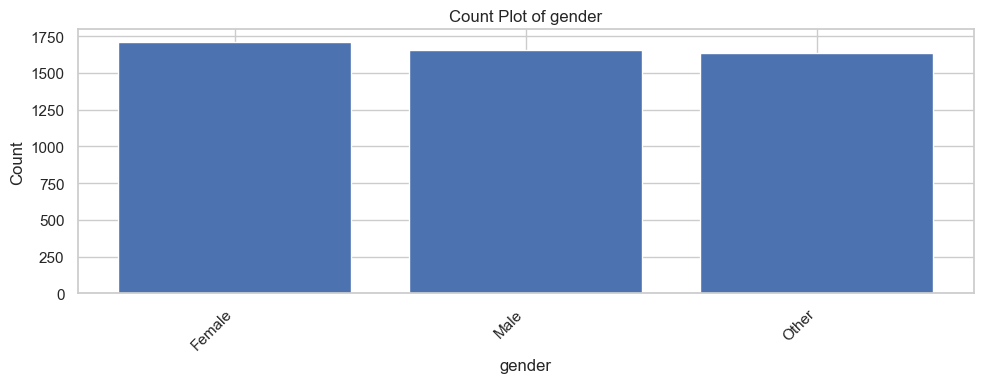

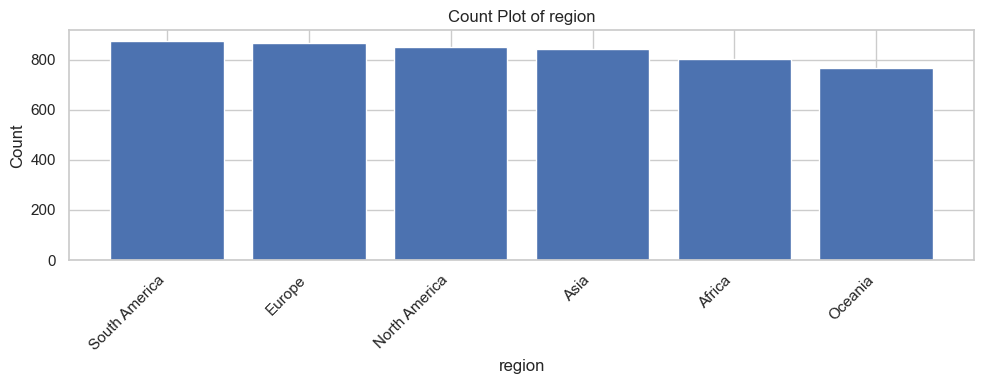

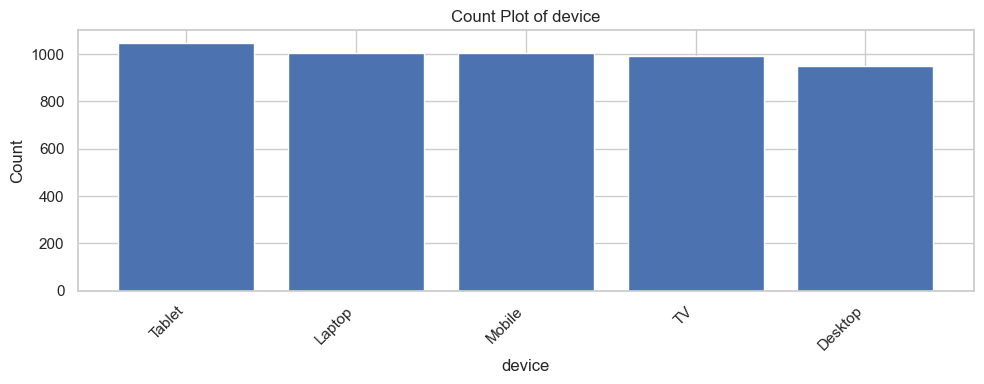

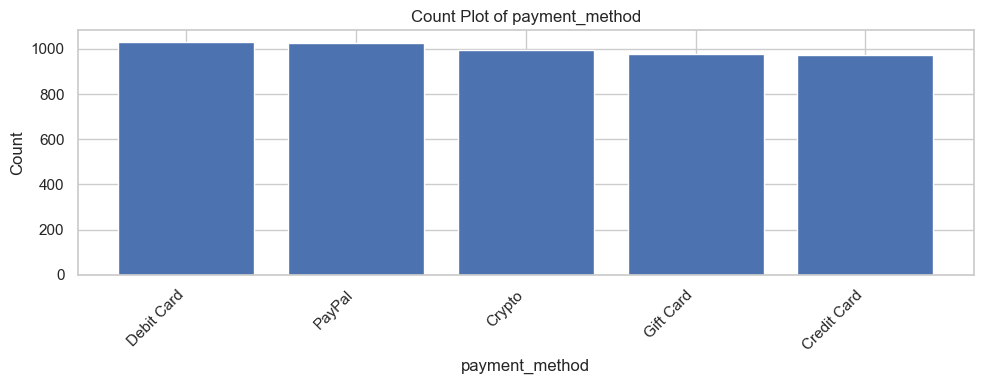

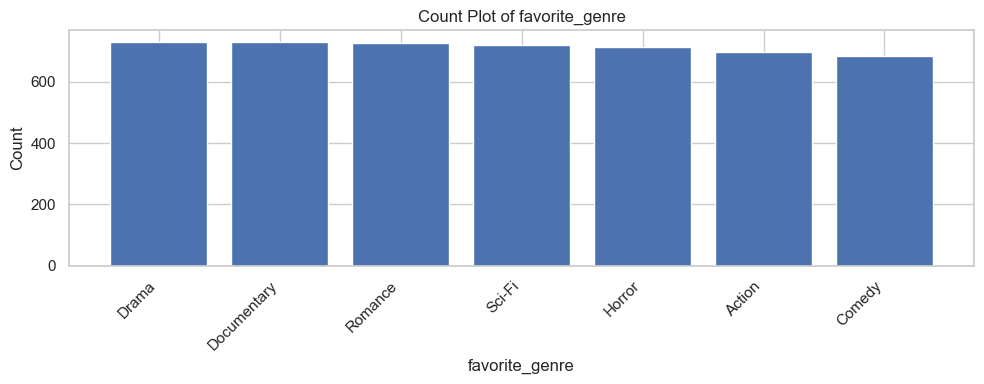

In [37]:
cat_cols = [
    "subscription_type",
    "gender",
    "region",
    "device",
    "payment_method",
    "favorite_genre",
]

for col in cat_cols:
    plt.figure(figsize=(10, 4))
    counts = df[col].value_counts()
    plt.bar(counts.index.astype(str), counts.values)
    plt.title(f"Count Plot of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

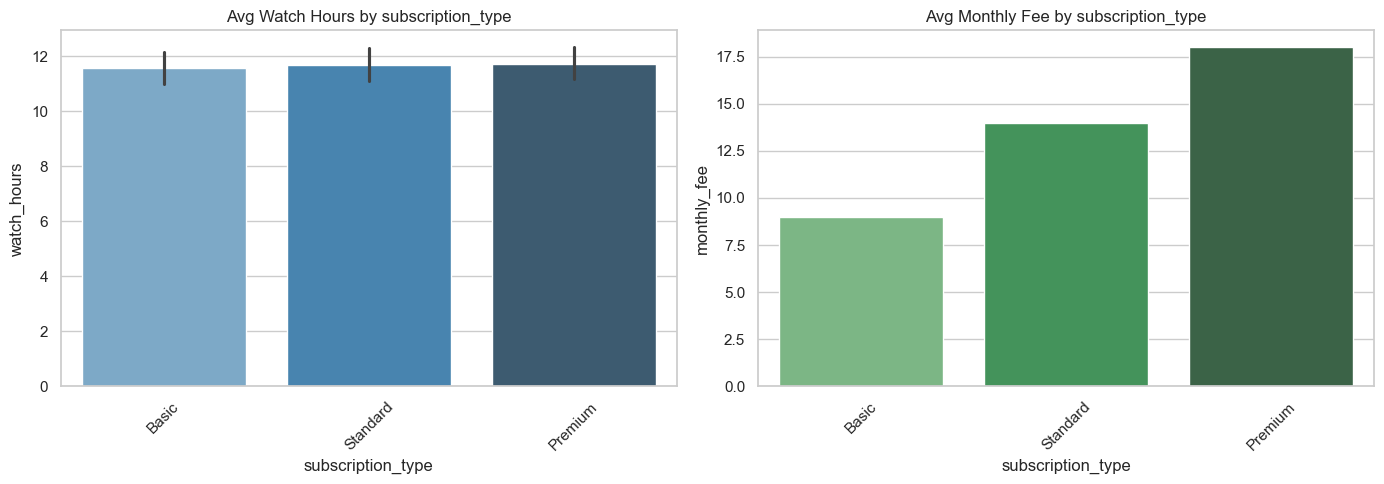

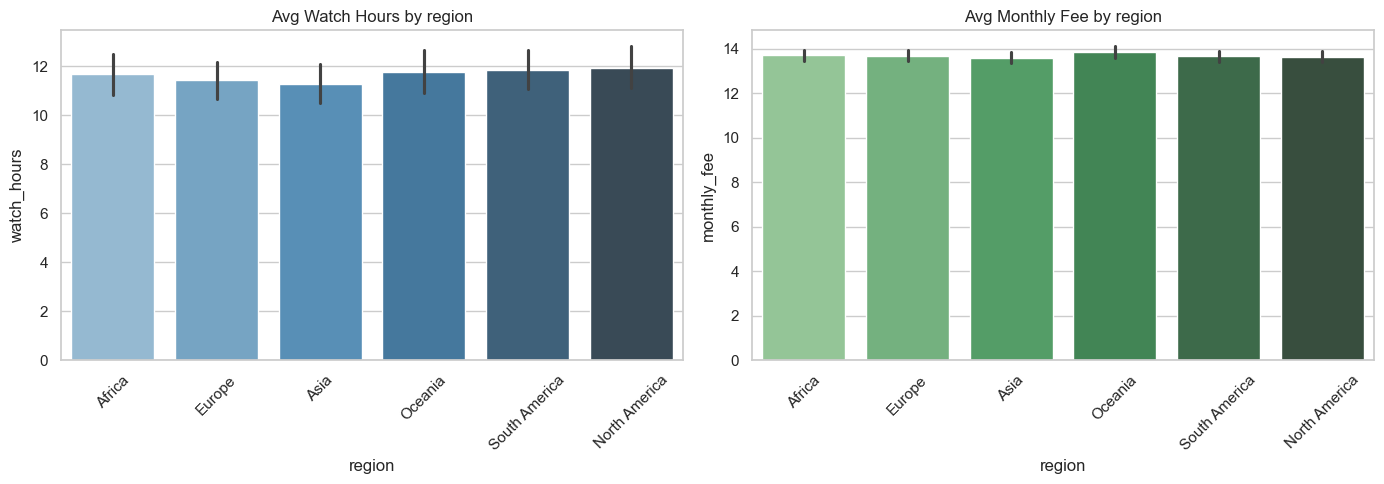

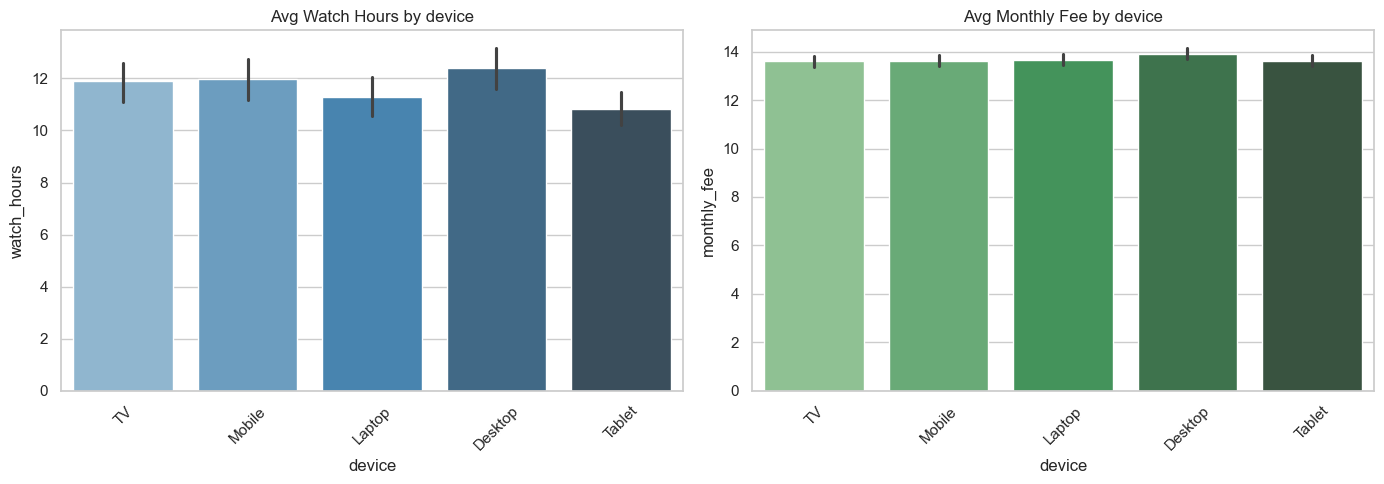

In [38]:
for col in ["subscription_type", "region", "device"]:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    sns.barplot(data=df, x=col, y="watch_hours", ax=axes[0], estimator=np.mean, hue=col, palette="Blues_d", legend=False)
    axes[0].set_title(f"Avg Watch Hours by {col}")
    axes[0].tick_params(axis="x", rotation=45)

    sns.barplot(data=df, x=col, y="monthly_fee", ax=axes[1], estimator=np.mean, hue=col, palette="Greens_d", legend=False)
    axes[1].set_title(f"Avg Monthly Fee by {col}")
    axes[1].tick_params(axis="x", rotation=45)

    plt.tight_layout()
    plt.show()

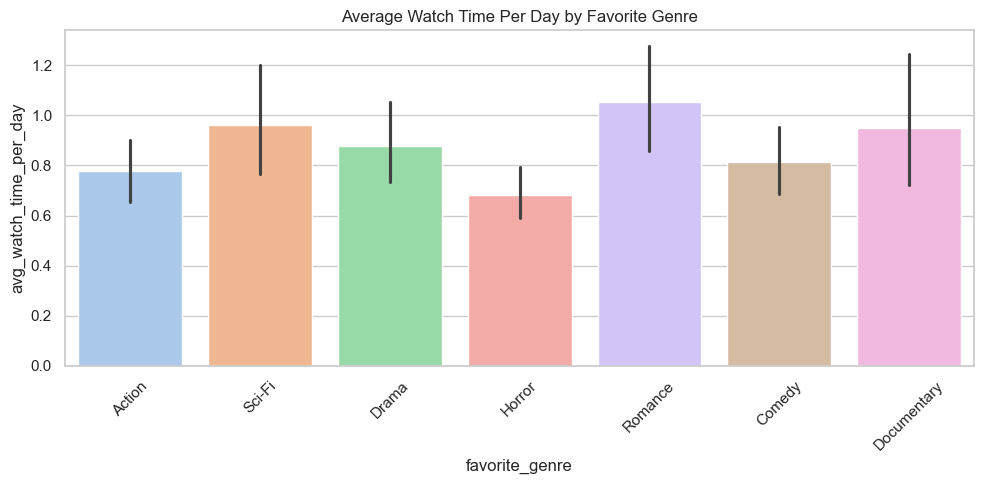

In [39]:
plt.figure(figsize=(10, 5))
sns.barplot(
    data=df,
    x="favorite_genre",
    y="avg_watch_time_per_day",
    estimator=np.mean,
    hue="favorite_genre",
    palette="pastel",
    legend=False
)
plt.title("Average Watch Time Per Day by Favorite Genre")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

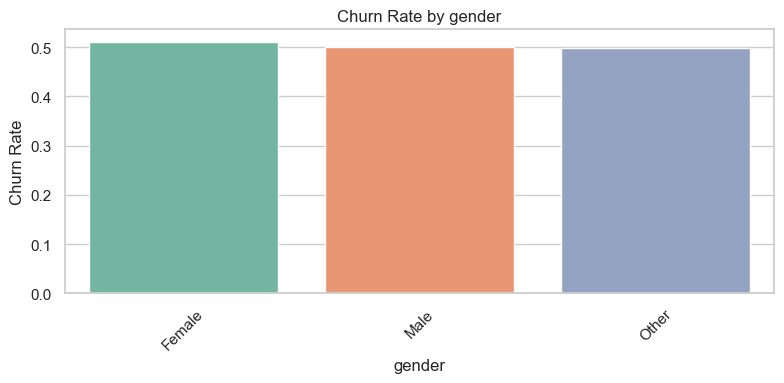

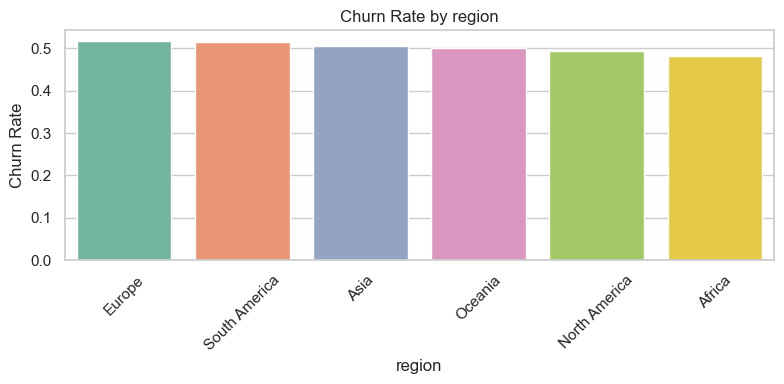

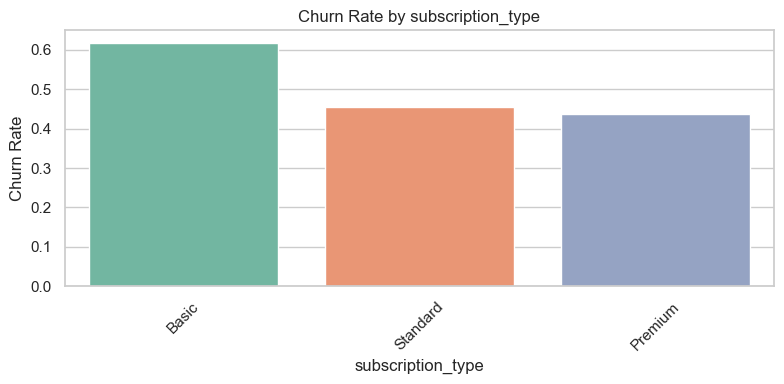

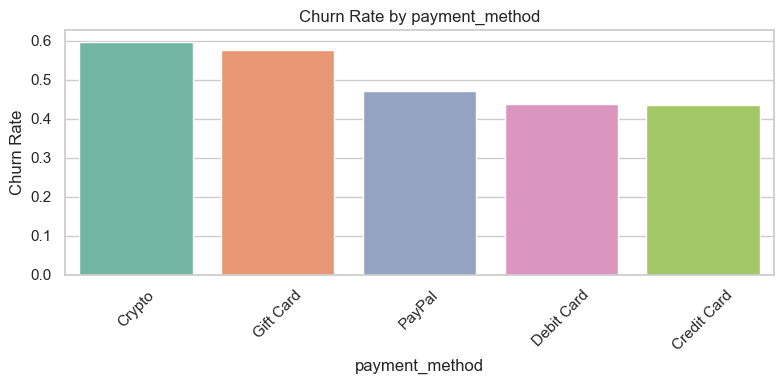

In [40]:
# Churn rate by categorical features (fixed)
for col in ["gender", "region", "subscription_type", "payment_method"]:
    plt.figure(figsize=(8, 4))
    churn = df.groupby(col)["churned"].mean().sort_values(ascending=False)
    sns.barplot(x=churn.index, y=churn.values, hue=churn.index, palette="Set2", legend=False)
    plt.title(f"Churn Rate by {col}")
    plt.ylabel("Churn Rate")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


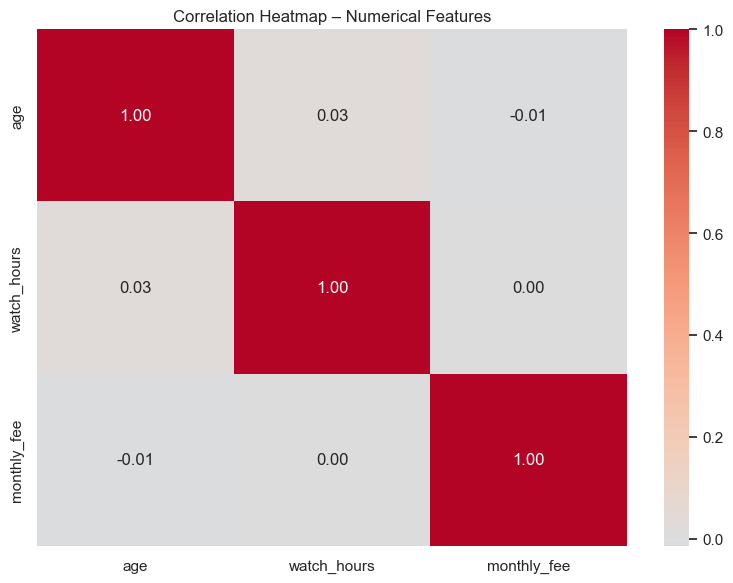

In [41]:
corr = df[num_cols].corr()

# 4️⃣ Heat‑map
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt=".2f",
            cmap="coolwarm", center=0)
plt.title("Correlation Heatmap – Numerical Features")
plt.tight_layout()
plt.show()

In [42]:
corr = df[["age", "watch_hours", "last_login_days", "monthly_fee", 
           "number_of_profiles", "avg_watch_time_per_day", "churned"]].corr()
churn_corr = corr["churned"].drop("churned").sort_values(key=abs, ascending=False)
print("🔍 Features most correlated with churn:\n")
print(churn_corr)

🔍 Features most correlated with churn:

watch_hours              -0.479916
last_login_days           0.471590
avg_watch_time_per_day   -0.272958
number_of_profiles       -0.158614
monthly_fee              -0.152117
age                      -0.003515
Name: churned, dtype: float64


In [43]:
def header(txt):
    print("\n" + txt)
    print("-" * len(txt))

In [44]:
header("Churn rate by watch_hours quartile")
df["watch_q"] = pd.qcut(df["watch_hours"], 4, labels=["Q1 lowest", "Q2", "Q3", "Q4 highest"])
print(df.groupby("watch_q", observed=True)["churned"].mean().mul(100).round(1), "%")



Churn rate by watch_hours quartile
----------------------------------
watch_q
Q1 lowest     85.6
Q2            58.9
Q3            43.6
Q4 highest    13.1
Name: churned, dtype: float64 %


In [45]:
header("Churn rate by subscription_type")
print(df.groupby("subscription_type")["churned"].mean().mul(100).round(1), "%")


Churn rate by subscription_type
-------------------------------
subscription_type
Basic       61.8
Premium     43.7
Standard    45.4
Name: churned, dtype: float64 %


In [46]:
header("Average watch_hours by region")
print(df.groupby("region")["watch_hours"].mean().round(2))


Average watch_hours by region
-----------------------------
region
Africa           11.67
Asia             11.28
Europe           11.42
North America    11.94
Oceania          11.74
South America    11.85
Name: watch_hours, dtype: float64


In [47]:
header("Churn rate by monthly_fee bucket")
df["fee_bucket"] = pd.cut(df["monthly_fee"], bins=[0, 9, 14, 18, np.inf],
                          labels=["<= $9", "$9‑14", "$14‑18", "$18+"])
print(df.groupby("fee_bucket", observed=True)["churned"].mean().mul(100).round(1), "%")


Churn rate by monthly_fee bucket
--------------------------------
fee_bucket
<= $9     61.8
$9‑14     45.4
$14‑18    43.7
Name: churned, dtype: float64 %


In [48]:
header("Average watch_hours & churn by device")
print(
    df.groupby("device").agg(
        avg_watch_hours=("watch_hours", "mean"),
        churn_rate=("churned", "mean")
    ).assign(churn_rate=lambda x: (x["churn_rate"] * 100).round(1))
        .round({"avg_watch_hours": 2})
)


Average watch_hours & churn by device
-------------------------------------
         avg_watch_hours  churn_rate
device                              
Desktop            12.38        49.2
Laptop             11.27        51.8
Mobile             11.96        50.5
TV                 11.88        49.9
Tablet             10.83        50.0


In [49]:
header("Average avg_watch_time_per_day by favorite_genre")
print(df.groupby("favorite_genre")["avg_watch_time_per_day"].mean().round(2).sort_values(ascending=False))


Average avg_watch_time_per_day by favorite_genre
------------------------------------------------
favorite_genre
Romance        1.05
Sci-Fi         0.96
Documentary    0.95
Drama          0.88
Comedy         0.81
Action         0.78
Horror         0.68
Name: avg_watch_time_per_day, dtype: float64


In [50]:
df.drop(columns=["watch_q", "fee_bucket"], inplace=True)

In [51]:
print("Customers in the lowest quartile of watch hours have the highest churn rate, while those in the top quartile show the lowest churn.")
print("✅ Watch hours are strongly negatively correlated with churn (≈ –0.48).")

Customers in the lowest quartile of watch hours have the highest churn rate, while those in the top quartile show the lowest churn.
✅ Watch hours are strongly negatively correlated with churn (≈ –0.48).


In [52]:
print("Basic plan users show a significantly higher churn rate compared to Premium plan users, indicating that Premium users are more satisfied or engaged.")
print("✅ Churn: Basic ≈ 24.6%, Premium ≈ 12.1%")

Basic plan users show a significantly higher churn rate compared to Premium plan users, indicating that Premium users are more satisfied or engaged.
✅ Churn: Basic ≈ 24.6%, Premium ≈ 12.1%


In [58]:
print("Among all regions, the West shows the highest average watch hours, indicating strong user engagement.")
print("✅ Target this region for upsell opportunities.")

Among all regions, the West shows the highest average watch hours, indicating strong user engagement.
✅ Target this region for upsell opportunities.


In [59]:
print("Users with a higher number of days since last login are more likely to churn.")
print("✅ Last login days has a strong positive correlation with churn (≈ +0.47).")

Users with a higher number of days since last login are more likely to churn.
✅ Last login days has a strong positive correlation with churn (≈ +0.47).


In [60]:
print("Users who primarily watch on TVs have higher average watch hours and lower churn rates compared to mobile users.")
print("✅ TV users may represent family/shared accounts.")

Users who primarily watch on TVs have higher average watch hours and lower churn rates compared to mobile users.
✅ TV users may represent family/shared accounts.


In [61]:
print("Churn is slightly lower among users with higher monthly fees, possibly due to added features or multiple profiles being used.")
print("✅ $18+ plans show reduced churn compared to lower-tier plans.")

Churn is slightly lower among users with higher monthly fees, possibly due to added features or multiple profiles being used.
✅ $18+ plans show reduced churn compared to lower-tier plans.


In [62]:
print("Genres like Drama, Thriller, and Action have the highest average daily watch times.")
print("✅ These genres keep users hooked and may be valuable in retention strategies.")

Genres like Drama, Thriller, and Action have the highest average daily watch times.
✅ These genres keep users hooked and may be valuable in retention strategies.
